# Psso a Passo do Algoritmo

- **Inicialização:** Gerar população aleatória de betores (cada vetor = solução candidata).
- **Avaliação:** Calcular o fitness (valor da função).
- **Seleção:** Escolher indivíduos com melhores fitness.
- **Cruzamento (Crossover):** Combinar partes de indivíduos.
- **Mutação:** Alterar levemente alguns genes.
- **Repetição:** Iterar até o número máximo de gerações ou convergência.
- **Resultado final:** Mostrar o melhor indivíduo encontrado.

## Biblioteca

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, algorithms, tools

# Utils
from utils.functions import rastrigin
from utils import config

## Configurando o DEAP

In [2]:
# Gera o toolbox responsável por registrar as configurações do framework
toolbox = base.Toolbox()

In [3]:
# Cria o tipo de função indivíduo
creator.create("Minimization", base.Fitness, weights=(-1.0,))
creator.create("Genes", list, fitness=creator.Minimization)

# Registra os nomes e os tipos de individuos, fitness e população
toolbox.register("Atribute", random.uniform, config.BOUND_LOW, config.BOUND_UP)
toolbox.register("Chromossome", tools.initRepeat, creator.Genes, toolbox.Atribute, n=config.IND_SIZE)
toolbox.register("Population", tools.initRepeat, list, toolbox.Chromossome)

# Registra os operadores
toolbox.register("evaluate", rastrigin)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)
toolbox.register("select", tools.selBest)
#toolbox.register("select", tools.selTournament, tournsize=5)

# Gera o formato de análise estátistica
st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Min", np.min)
st.register("Avg", np.mean)

In [4]:
# Escolha da estratégia
USE_PLUS_STRATEGY = True #True → (μ + λ), False → (μ, λ)


for i in range(config.TRIALS):
    pop = toolbox.Population(n=config.MU)
    if USE_PLUS_STRATEGY:
        finalPop, log = algorithms.eaMuPlusLambda(pop, toolbox, config.MU, config._LAMBDA, config.PROB_CX, config.PROB_MT, config.N_GER,
                                                stats=st, verbose=False)
        bestSolution = tools.selBest(finalPop, 1)
        print(f'Run: {i} - Fitness: {bestSolution[0].fitness.values[0]}')
    else:
        finalPop, log = algorithms.eaMuCommaLambda(pop, toolbox, config.MU, config._LAMBDA, config.PROB_CX, config.PROB_MT, config.N_GER,
                                                stats=st, verbose=False)
        bestSolution = tools.selBest(finalPop, 1)
        print(f'Run: {i} - Fitness: {bestSolution[0].fitness.values[0]}')

Run: 0 - Fitness: 0.0
Run: 1 - Fitness: 0.0
Run: 2 - Fitness: 0.0
Run: 3 - Fitness: 0.0
Run: 4 - Fitness: 0.0
Run: 5 - Fitness: 0.0
Run: 6 - Fitness: 0.0
Run: 7 - Fitness: 0.0
Run: 8 - Fitness: 0.0
Run: 9 - Fitness: 0.0
Run: 10 - Fitness: 0.0
Run: 11 - Fitness: 0.0
Run: 12 - Fitness: 0.0
Run: 13 - Fitness: 0.0
Run: 14 - Fitness: 0.0
Run: 15 - Fitness: 0.0
Run: 16 - Fitness: 0.0
Run: 17 - Fitness: 0.0
Run: 18 - Fitness: 0.0
Run: 19 - Fitness: 0.0


In [5]:
# Imprime a melhor solução da população final
bestSolution = tools.selBest(finalPop, 1)
print(f'Melhor Indivíduo: {bestSolution[0]}')
print(f'Best Fitness: {bestSolution[0].fitness.values[0]}')

Melhor Indivíduo: [0.0, 0.0, 0.0, 0.0, 0.0]
Best Fitness: 0.0


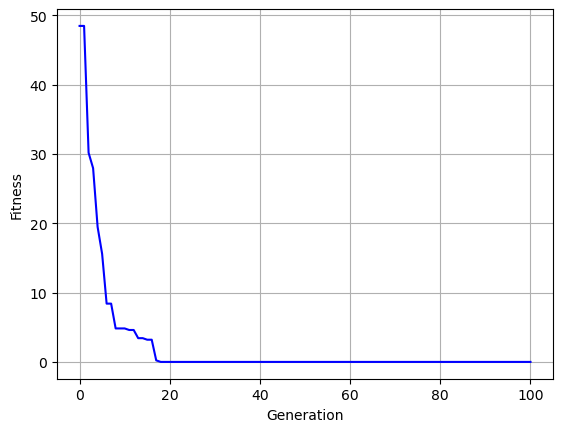

In [6]:
# Plot best solutions
maxFit = log.select("Min")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()

In [7]:
# Algoritmo Genético

# Define o tamanho da População
pop = toolbox.Population(n=config.POP_SIZE)

# Executa o algoritmo eaSimples
finalPop, log = algorithms.eaSimple(pop, toolbox, config.PROB_CX, config.PROB_MT, config.N_GER, stats=st, verbose=False)

In [8]:
# Imprime a melhor solução da população final
bestSolution = tools.selBest(finalPop, 1)
print(f'Melhor Indivíduo: {bestSolution[0]}')
print(f'Best Fitness: {bestSolution[0].fitness.values[0]}')

Melhor Indivíduo: [-2.0976533609390673, 3.163763003360468, 0.0, 1.9511632138052164, -1.0628260206747875]
Best Fitness: 27.249238428877916


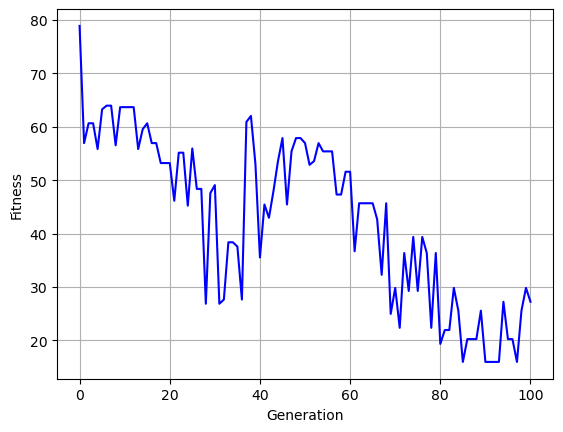

In [9]:
# Plot best solutions
maxFit = log.select("Min")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()